In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

In [52]:
df = pd.read_csv('Student_performance_data _.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [9]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [20]:
df = df[['Age', 'Gender', 'Ethnicity', 'ParentalEducation','GPA']]
df

,Age,Gender,Ethnicity,ParentalEducation,GPA
0,17,1,0,2,2.929196
1,18,0,0,1,3.042915
2,15,0,2,3,0.112602
3,17,1,0,3,2.054218
4,17,1,0,2,1.288061
...,...,...,...,...,...
2387,18,1,0,3,3.455509
2388,17,0,0,1,3.279150
2389,16,1,0,2,1.142333
2390,16,1,1,0,1.803297


In [22]:
df_gpa = df.loc[:, 'GPA']
df_gpa

0       2.929196
1       3.042915
2       0.112602
3       2.054218
4       1.288061
          ...   
2387    3.455509
2388    3.279150
2389    1.142333
2390    1.803297
2391    2.140014
Name: GPA, Length: 2392, dtype: float64

In [18]:
df_gpa = df_gpa.round(2)
df_gpa

0       2.93
1       3.04
2       0.11
3       2.05
4       1.29
        ... 
2387    3.46
2388    3.28
2389    1.14
2390    1.80
2391    2.14
Name: GPA, Length: 2392, dtype: float64

# **Teste T-Student:**
Hipótese nula (H0): a média das notas (GPA) é igual a 2.0.

Hipótese alternativa (H1): a média das notas (GPA) é diferente de 2.0 (two-sided - maior ou menor)


In [53]:
h0 = 2
h1 = 'two-sided'
media_gpa = df_gpa.mean()
print('Média populacional:', h0)
print('Média amostral:', media_gpa)
t_statistic, p_value = stats.ttest_1samp(df_gpa, popmean= h0)

print('Estatística t:', t_statistic)
print('Valor p:', p_value)



Média populacional: 2
Média amostral: 1.9061863027265407
Estatística t: -5.013624381766575
Valor p: 5.733044870766935e-07


In [48]:
if p_value <= 0.05:
    print(f"Rejeitamos a hipótese nula. A média do GPA dos alunos é significativamente diferente de {h0}.")
else:
    print(f"Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a média do GPA dos alunos é diferente de {h0}.")

Rejeitamos a hipótese nula. A média do GPA dos alunos é significativamente diferente de 2.


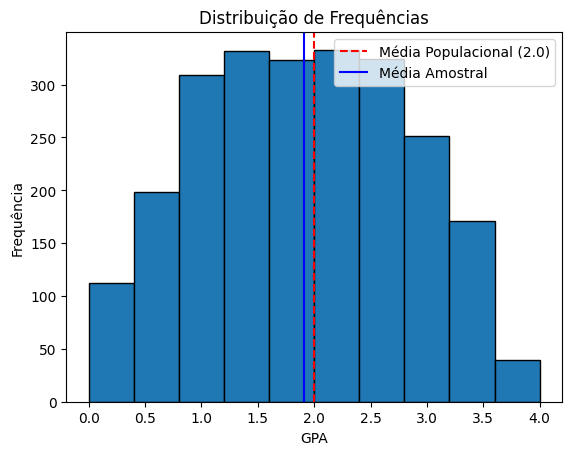

In [47]:
plt.hist(df_gpa, bins=10, edgecolor='black')
plt.xlabel('GPA')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências')

plt.axvline(h0, color='red', linestyle='--', label='Média Populacional (2.0)')
plt.axvline(df_gpa.mean(), color='blue', linestyle='-', label='Média Amostral')

plt.legend()
plt.show()